In [11]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [12]:
#create dataset using DataFrame
df=pd.DataFrame({'X':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
                 'y':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]})
f1 = df['X'].values
f2 = df['y'].values
X = np.array(list(zip(f1, f2)))
print(X)

# Define the data points
# data_points = np.array([[0.1, 0.6],
#                        [0.15, 0.71],
#                        [0.08, 0.9],
#                        [0.16, 0.85],
#                        [0.2, 0.3],
#                        [0.25, 0.5],
#                        [0.24, 0.1],
#                        [0.3, 0.2]])
     

[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.2  0.3 ]
 [0.25 0.5 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]


In [15]:
#centroid points
C_x=np.array([0.1,0.3])
C_y=np.array([0.6,0.2])
centroids=C_x,C_y

#centroids = np.array([[0.1, 0.6],
#                              [0.3, 0.2]])


In [17]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=2, init=centroids, n_init=1)
kmeans.fit(X)
#kmeans.fit(data_points)


KMeans(init=(array([0.1, 0.3]), array([0.6, 0.2])), n_clusters=2, n_init=1)

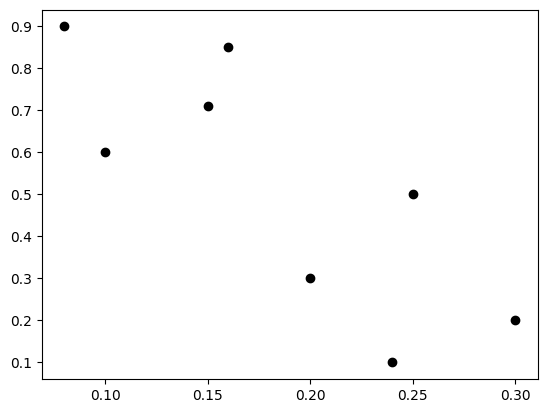

In [18]:
#plot the given points
colmap = {1: 'r', 2: 'b'}
plt.scatter(f1, f2, color='k')
plt.show()

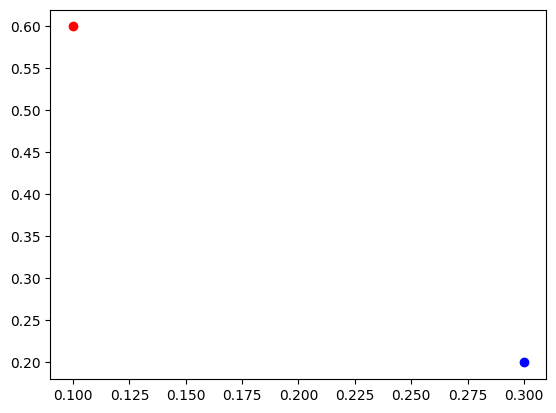

[[0.1 0.3]
 [0.6 0.2]]


In [19]:
#for i in centroids():
plt.scatter(C_x[0],C_y[0], color=colmap[1])
plt.scatter(C_x[1],C_y[1], color=colmap[2])
plt.show()

C = np.array(list((C_x, C_y)), dtype=np.float32)
print (C)

point No.6[0.25,0.5] is belongs to blue cluster(cluster no:2)


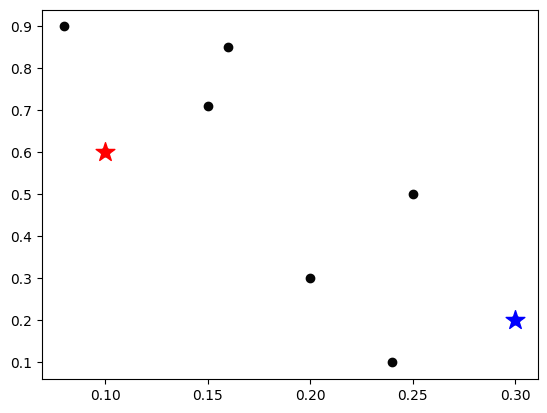

In [20]:
#plot given elements with centroid elements
plt.scatter(f1, f2, c='#050505')
print("point No.6[0.25,0.5] is belongs to blue cluster(cluster no:2)")
plt.scatter(C_x[0], C_y[0], marker='*', s=200, c='r')
plt.scatter(C_x[1], C_y[1], marker='*', s=200, c='b')
plt.show()

In [21]:
#import KMeans class and create object of it
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,random_state=0)
model.fit(X)
labels=model.labels_
print(labels)

[1 1 1 1 0 0 0 0]


C:\Users\HARIHAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
#using labels find population around centroid
count=0
for i in range(len(labels)):
    if (labels[i]==1):
        count=count+1

print('No of population around cluster 2:',count-1)

No of population around cluster 2: 3


In [23]:
#Find new centroids
new_centroids = model.cluster_centers_

print('Previous value of m1 and m2 is:')
print('M1==',centroids[0])
print('M1==',centroids[1])

print('Updated value of m1 and m2 is:')
print('M1==',new_centroids[0])
print('M1==',new_centroids[1])


Previous value of m1 and m2 is:
M1== [0.1 0.3]
M1== [0.6 0.2]
Updated value of m1 and m2 is:
M1== [0.2475 0.275 ]
M1== [0.1225 0.765 ]


In [24]:
# Retrieve the cluster labels for each data point
cluster_labels = kmeans.labels_

# Retrieve the updated centroids
updated_centroids = kmeans.cluster_centers_

In [25]:
# Answering the questions:

# 1] Which cluster does P6 belong to?
point_p6 = np.array([0.25, 0.5])
cluster_p6 = kmeans.predict([point_p6])[0]
cluster_p6 += 1  # Adding 1 to match the cluster numbering in the question
print("1] P6 belongs to Cluster C" + str(cluster_p6))

1] P6 belongs to Cluster C1


In [26]:
# 2] What is the population of cluster around m2?
cluster_m2 = 2  # Cluster C2
population_m2 = np.sum(cluster_labels == (cluster_m2 - 1))
print("2] The population of cluster around m2 is", population_m2)

2] The population of cluster around m2 is 4


In [27]:
# 3] What is the updated value of m1 and m2?
updated_m1 = updated_centroids[0]
updated_m2 = updated_centroids[1]
print("3] The updated value of m1 is", updated_m1)
print("   The updated value of m2 is", updated_m2)

3] The updated value of m1 is [0.2475 0.275 ]
   The updated value of m2 is [0.1225 0.765 ]


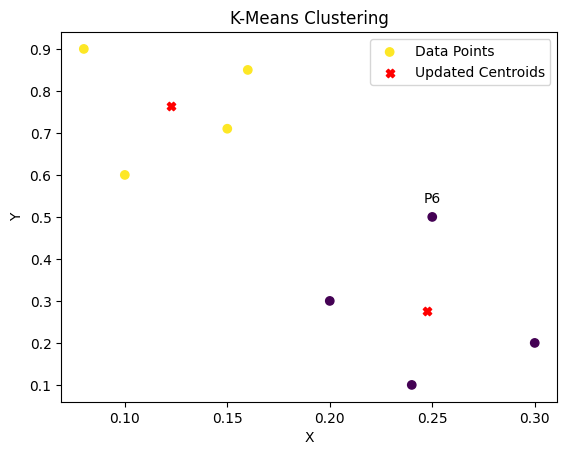

In [29]:
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')

# Scatter plot of the updated centroids
plt.scatter(updated_centroids[:, 0], updated_centroids[:, 1], color='red', marker='X', label='Updated Centroids')

# Plotting the annotation for P6
plt.annotate('P6', (0.25, 0.5), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.show()